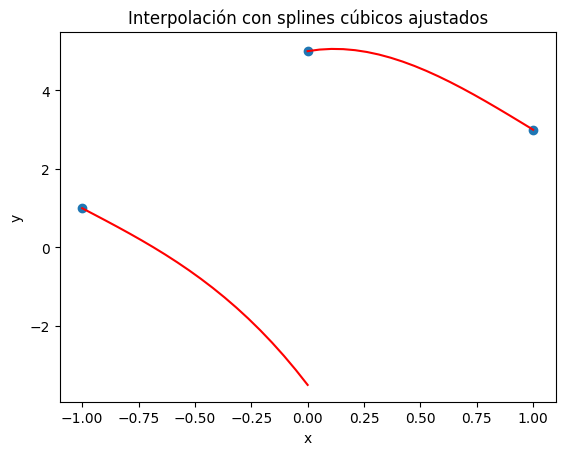

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

def adjust_spline_tangency(pars: dict[str, float], x0: float, m: float) -> dict[str, float]:
    # Ajustar el coeficiente b para que coincida con la pendiente deseada
    pars["b"] = m
    return pars

xs = [-1, 0, 1]
ys = [1, 5, 3]
desired_slope = -3  # Pendiente deseada en el punto (x1, y1)

s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]

# Ajustar el spline en el punto (x1, y1) para que sea tangente a la pendiente deseada
s[0] = adjust_spline_tangency(s[0], xs[0], desired_slope)

for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos ajustados")
plt.show()
